---
title: Dataset Characterization
author: Andrei Akopian
date: 2026-01-10
format:
  html:
    code-fold: true
    code-summary: "Show the code"
  pdf:
    code-overflow: wrap
    echo: false
    output: true
---

# List of problems
duplicate items
odd values near zero in 1370-1400 range

# Abstract

A list of details, notes, and concerns regarding the dataset used by the science team to train their models. The dataset `original_data.csv` consists of 1723 datapoints each 210 wavelengths from 400nm to 2490nm in steps of 10. Majority of the data comes from locations in the US, done for example by NASA's JPL. The dataset has several issues: Sometimes one of the fractions of npv, gv, or soil are `0.0`. There is 1 duplicate datapoint in the dataset (`QUE_T1.11.A` and `QUE_T1.11.H`). And around 400 spectra have an anomaly of some form around 1400nm and 1900nm wavelengths. Also, the 1400nm and 1900nm wavelengths behave stragely in general and correlate very poorly with any of the other wavelengths. Also, some of the datapoints are listed as comming from Goleta, California which is an urban city.

In [128]:
import pandas as pd
import numpy as np
import spectral_library # * all major functions have been moved here
import matplotlib.pyplot as plt
import scipy
from icecream import ic
import mpltern

In [3]:
df = spectral_library.open_file('unmixing/original_data.csv')

In [4]:
fractions, nr400to2490, _ = spectral_library.take_subset(df,start=400,end=2490)

In [5]:
wavelengths = nr400to2490.columns

In [8]:
wavelengths[-1]

'2490'

In [116]:
def simple_histogram(data=[1,2,3],title="Title",x="x-axis",y='y-axis',bins=10):
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)
    ax.hist(data,bins=bins)
    print()

### General Overview of Dataset

Below is a heatmap of all the datapoints. It is a heatmap, but it can be thought of a simply all the datapoints being ploted all at once.

Attention to the following features:
- a strange "flip" of the graph near 700nm
- a similar strange change in shape near 1400nm
- black stripes and points near zero around 1900nm
  - there is a similar stripe near 1400nm as well, but much less visible
  - something similar (?) near the very last wavelength

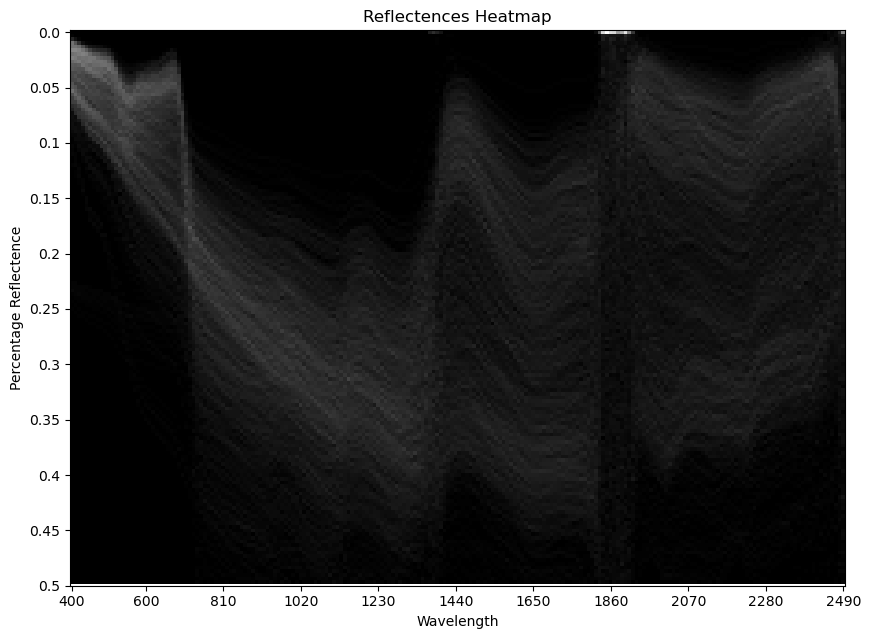

In [176]:
fig, ax = plt.subplots(figsize=(10, 8))

resolution = 300
def contrast(array, coef=1.3):
    return array ** (1/coef)
start = 0
end = resolution // 2
xticks = nr400to2490.columns
bins = [1/resolution*i for i in range(0,end+1)]
l = [contrast(np.histogram(nr400to2490[s], bins=bins)[0]) for s in xticks]
np_formatted_l = np.rot90(np.fliplr(np.vstack(l)))

ax.imshow(np_formatted_l, vmin=0, cmap='gray')

ax.set_title("Reflectences Heatmap")
ax.set_xlabel("Wavelength")
ax.set_ylabel("Percentage Reflectence")

n_ticks = 11
idx = np.linspace(0, len(xticks)-1, n_ticks, dtype=int)
ticks = xticks[idx]
plt.xticks(idx, ticks)
idx = np.linspace(0, end, n_ticks, dtype=int)
yticks = idx / resolution
plt.yticks(idx, yticks)

plt.show()

To make the anomalies even clearer, here are some histograms:

The 1370nm graph shows an amount of points near zero, there are similar issues in the next few wavelengths. Also, notice the sudden change in distribution to bimodal (two hills) at 1390nm.

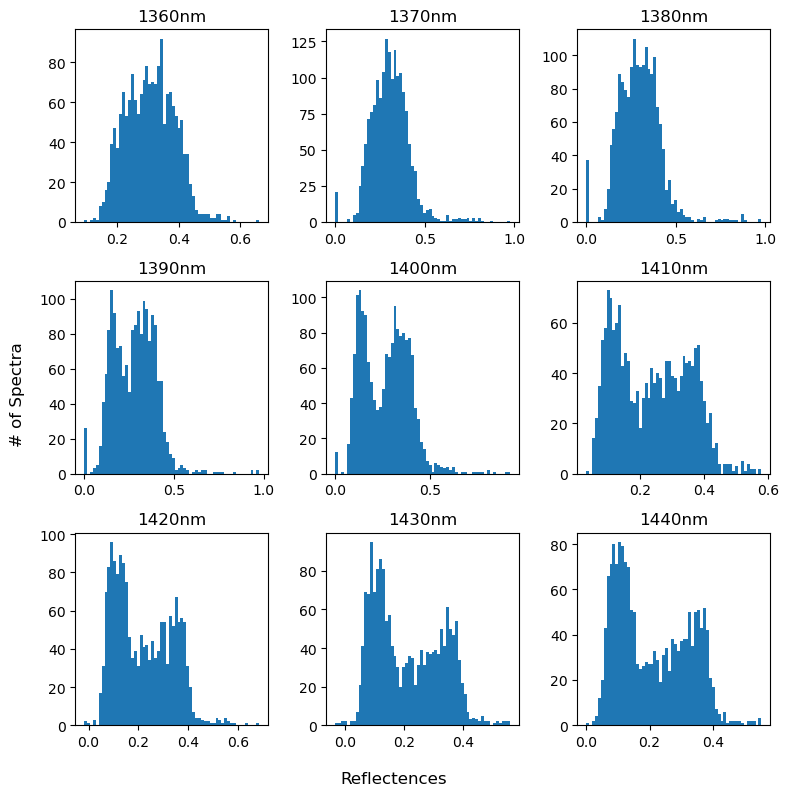

In [55]:
# Create a 2x2 grid of subplots
start = 1360
spectra = [str(i) for i in range(start, start+10*9, 10)]
n_plots = len(spectra)
row = int(np.ceil(np.sqrt(n_plots)))
fig, axs = plt.subplots(row, row, figsize=(8, 8))

fig.supxlabel("Reflectences")
fig.supylabel("# of Spectra")

for i, s in enumerate(spectra):
    px = i % row 
    py = i // row
    axs[py, px].hist(nr400to2490[s],bins=60)
    axs[py, px].set_title(s+'nm')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Here is the "flip" near 700nm visualized. Again observe the change in distribution.

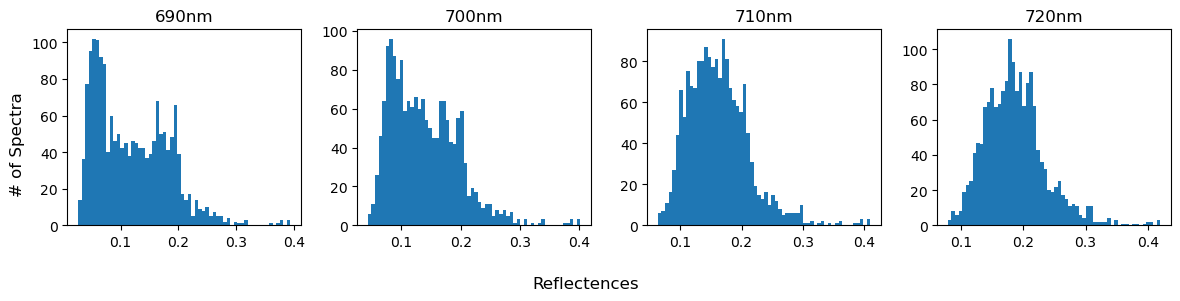

In [78]:
# Create a 2x2 grid of subplots
start = 690
spectra = [str(i) for i in range(start, start+10*4, 10)]
n_plots = len(spectra)
fig, axs = plt.subplots(1, n_plots, figsize=(12, 3))

fig.supxlabel("Reflectences")
fig.supylabel("# of Spectra")

for i, s in enumerate(spectra):
    axs[i].hist(nr400to2490[s],bins=60)
    axs[i].set_title(s+'nm')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

And the 1860nm region anomaly:

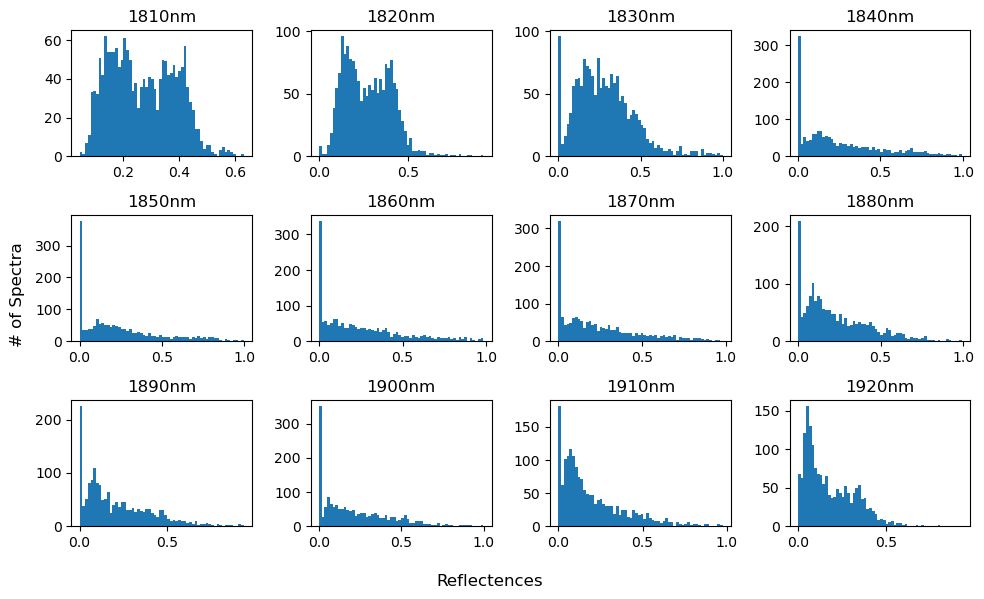

In [90]:
# Create a 2x2 grid of subplots
start = 1810
spectra = [str(i) for i in range(start, start+10*12, 10)]
n_plots = len(spectra)
# row = int(np.ceil(np.sqrt(n_plots)))
fig, axs = plt.subplots(3, 4, figsize=(10, 6))

fig.supxlabel("Reflectences")
fig.supylabel("# of Spectra")

for i, s in enumerate(spectra):
    px = i % row 
    py = i // row
    axs[py, px].hist(nr400to2490[s],bins=60)
    axs[py, px].set_title(s+'nm')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Finally 2490nm 

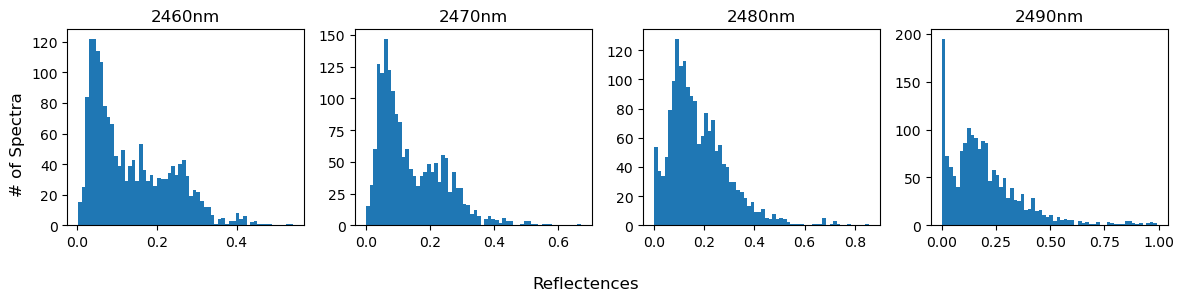

In [93]:
# Create a 2x2 grid of subplots
start = 2460
spectra = [str(i) for i in range(start, start+10*4, 10)]
n_plots = len(spectra)
fig, axs = plt.subplots(1, n_plots, figsize=(12, 3))

fig.supxlabel("Reflectences")
fig.supylabel("# of Spectra")

for i, s in enumerate(spectra):
    axs[i].hist(nr400to2490[s],bins=60)
    axs[i].set_title(s+'nm')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Around 700 points have these near zero anomalies.

### Duplicate Datapoint
The duplicates are:
```
QUE_T1.11.A (index 517)
QUE_T1.11.H (index 524)
```
Here is a simple check on just one wavelength, that reveals the two datapoints. One can visualy inspect them to confirm that they are indeed equal on all fields. 

There are no other duplicates.

In [ ]:
data = df['400']
for i in range(data.shape[0]):
    for j in range(i+1, data.shape[0]):
        if data[i] == data[j] and i!=j:
            print(df['Spectra'][i], i)

QUE_T1.11.A 517
QUE_T1.11.H 524


In [16]:
(df.iloc[517] == df.iloc[524]).sum() # matches on 216 of the 217 columns (all but the name)

np.int64(216)

### The Anomalies

In [173]:
anomalies_i = [i for i in range(nr400to2490.shape[0]) if nr400to2490.iloc[i].min()==0]
complementary_indices = nr400to2490.index.difference(anomalies_i)
len(anomalies)

442

In [174]:
anomalies = df.iloc[anomalies_i]
non_anomalies = df.iloc[complementary_indices]

/var/folders/8m/2xtf2jw17lb35znwjpyxlhhr0000gn/T/ipykernel_25339/3893616000.py:3: RuntimeWarning: divide by zero encountered in log
  simple_histogram(np.log(mins).clip(-40, 100), bins=100,  x='log of the minimums', y='count', title='logged minimums of datapoints (-40 are the zeros)',)
/var/folders/8m/2xtf2jw17lb35znwjpyxlhhr0000gn/T/ipykernel_25339/3893616000.py:3: RuntimeWarning: invalid value encountered in log
  simple_histogram(np.log(mins).clip(-40, 100), bins=100,  x='log of the minimums', y='count', title='logged minimums of datapoints (-40 are the zeros)',)


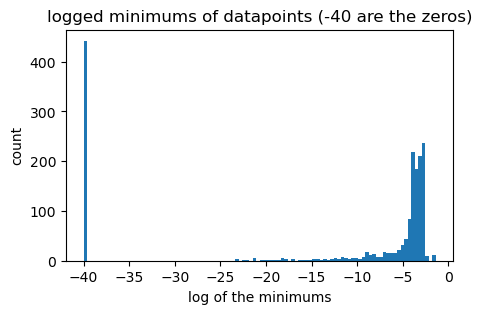

In [148]:
#| output: false
mins = np.fromiter((nr400to2490.iloc[i].min() for i in range(nr400to2490.shape[0])), dtype=float)
simple_histogram(np.log(mins).clip(-40, 100), bins=100,  x='log of the minimums', y='count', title='logged minimums of datapoints (-40 are the zeros)',)

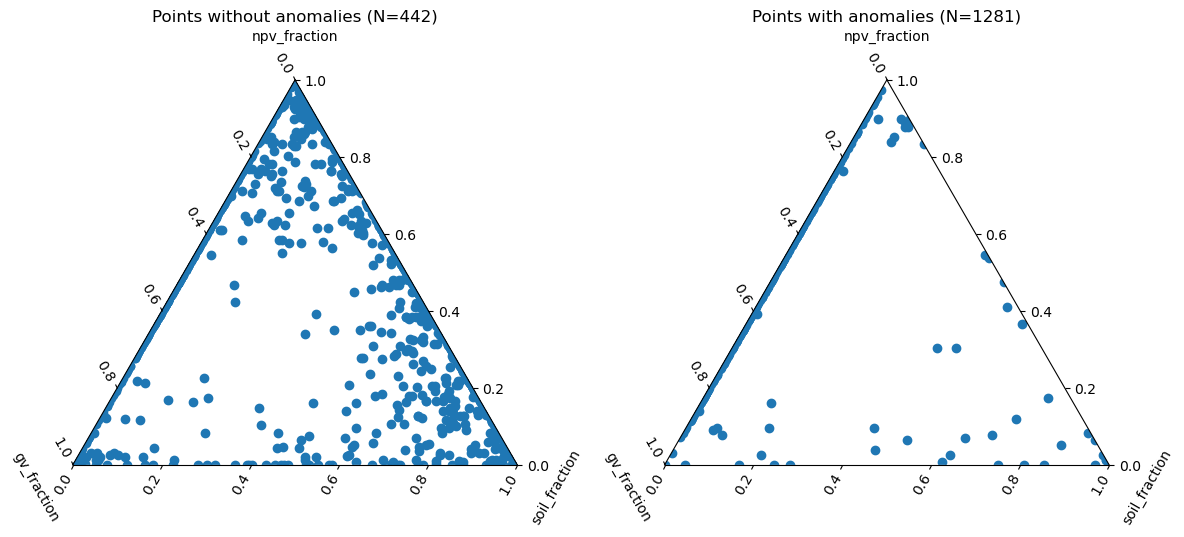

In [175]:
fig, axs = plt.subplots(1, 2, 
    figsize=(14, 5), 
    subplot_kw={'projection': 'ternary'}
)

ax1 = axs[0]
pc = ax1.scatter(non_anomalies['npv_fraction'],non_anomalies['gv_fraction'],non_anomalies['soil_fraction'])
ax1.set_tlabel('npv_fraction')
ax1.set_llabel('gv_fraction')
ax1.set_rlabel('soil_fraction')
ax1.set_title(f'Points without anomalies (N={len(anomalies_i)})')

ax2 = axs[1]
pc = ax2.scatter(anomalies['npv_fraction'],anomalies['gv_fraction'],anomalies['soil_fraction'])
ax2.set_tlabel('npv_fraction')
ax2.set_llabel('gv_fraction')
ax2.set_rlabel('soil_fraction')
ax2.set_title(f'Points with anomalies (N={nr400to2490.shape[0] - len(anomalies_i)})')
plt.show()

### Correlations

Investigation of correlations between different wavelengths reveals anomalies. The tests are done via naive linear regression, but it is sufficient to reveal strange behaviors.

In [18]:
p1_set = set()
p2_set = set()
all_set = {i for i in range(0, nr400to2490.shape[0])}
s = nr400to2490['1620']
for i in range(nr400to2490.shape[0]):
    if s.iloc[i] < 0.3:
        p1_set.add(i)
    else:
        p2_set.add(i)

In [20]:
def linear_regression_check(a, b, drop_list):
    a = a.drop(drop_list)
    b = b.drop(drop_list)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(a, b)
    return r_value**2

def strange_check(a, b, drop_list):
    a1 = a.drop(drop_list.union(p2_set))
    a2 = a.drop(drop_list.union(p1_set))
    b1 = b.drop(drop_list.union(p2_set))
    b2 = b.drop(drop_list.union(p1_set))
    slope1, intercept1, r_value1, p_value1, std_err1 = scipy.stats.linregress(a1, b1)
    slope2, intercept2, r_value2, p_value2, std_err2 = scipy.stats.linregress(a2, b2)
    return (r_value1**2 + r_value2**2) / 2

In [19]:
TRESHOLD = 0.01
drop_lists = dict()
for i in wavelengths:
    drop_list = set()
    w = nr400to2490[i]
    for k in range(nr400to2490.shape[0]):
        if w.iloc[k]<TRESHOLD:
            drop_list.add(k)
    drop_lists[i] = drop_list

In [21]:
# Takes 13 seconds for 210x210
correlations = []
for wi, i in enumerate(wavelengths):
    layer = []
    for wj, j in enumerate(wavelengths):
        a = nr400to2490[i]
        b = nr400to2490[j]
        drop_list = drop_lists[i].union(drop_lists[j])
        layer.append(linear_regression_check(a, b, drop_list))
    correlations.append(layer)


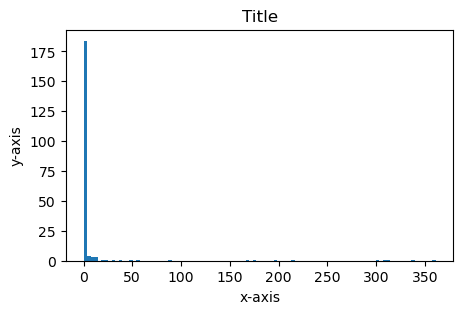

In [27]:
simple_histogram([len(drop_lists[x]) for x in drop_lists], bins=100)

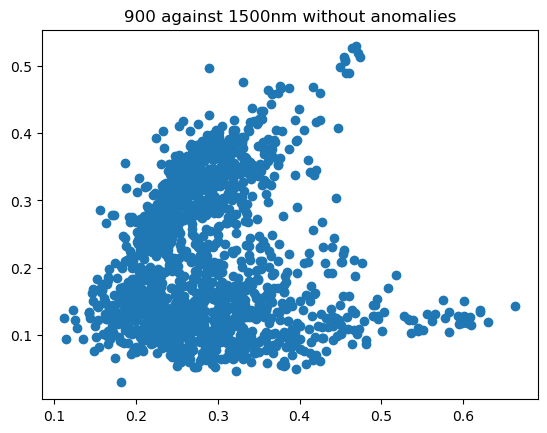

In [26]:
a = '900'
b = '1500'
drop_list = drop_lists[a].union(drop_lists[b])
# drop_list = set()
plt.scatter(nr400to2490[a].drop(drop_list), nr400to2490[b].drop(drop_list))
plt.title(f'{a} against {b}nm without anomalies')
plt.show()

In [25]:
def simple_histogram(data=[1,2,3],title="Title",x="x-axis",y='y-axis',bins=10):
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)
    ax.hist(data,bins=bins)
    print()

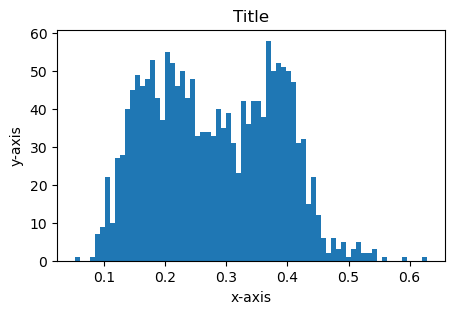

In [88]:
simple_histogram(nr400to2490['1620'], bins=70)

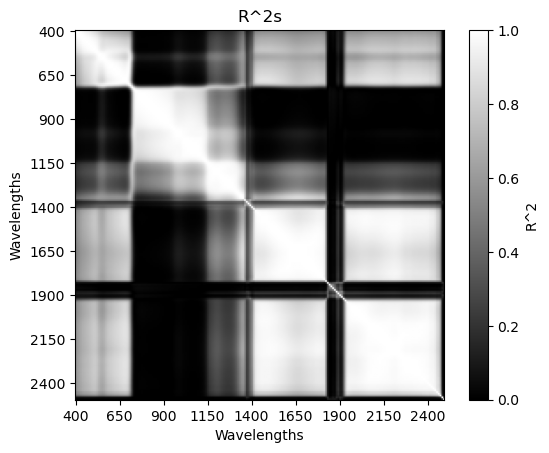

In [16]:
fig, ax = plt.subplots()

img = ax.imshow(correlations, vmin=0, cmap='gray')

ax.set_title("R^2s")
ax.set_xlabel("Wavelengths")
ax.set_ylabel("Wavelengths")
tick_locations = np.arange(0, 210, 25)
tick_labels = [wavelengths[i] for i in tick_locations]
ax.set_xticks(tick_locations, tick_labels)
ax.set_yticks(tick_locations, tick_labels)

cbar = fig.colorbar(img, ax=ax, label='R^2')

plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(actual, predictions)